# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [2]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [3]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [4]:
#  1. Get the total rides for each city type
total_ride_count = pyber_data_df.groupby(['type']).count()["ride_id"]

In [5]:
# 2. Get the total drivers for each city type
total_driver_sum = city_data_df.groupby(['type']).sum()["driver_count"]
total_driver_sum

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [6]:
#  3. Get the total amount of fares for each city type
total_ride_fare= pyber_data_df.groupby(['type']).sum()["fare"]

In [7]:
#  4. Get the average fare per ride for each city type. 
total_ride_fare_avg = total_ride_fare/ total_ride_count
total_ride_fare_avg

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [8]:
# 5. Get the average fare per driver for each city type.
total_driver_avg_fare = total_ride_fare / total_driver_sum
total_driver_avg_fare

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [9]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame(
    {
        "Total Rides": total_ride_count,
        "Total Drivers": total_driver_sum,
        "Total Fares": total_ride_fare,
        "Average Fare per Ride": total_ride_fare_avg,
        "Average Fare per Driver": total_driver_avg_fare 
    }
)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [10]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [22]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)

pyber_summary_df


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [24]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [28]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
total_fare_amount_per_date_df =pyber_data_df.groupby(["type","date"]).sum()[["fare"]]
total_fare_amount_per_date_df.head()

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33

In [33]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
total_fare_amount_per_date_df = total_fare_amount_per_date_df.reset_index()

In [36]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

pyber_pivot_df = total_fare_amount_per_date_df.pivot(index='date', columns='type', values='fare')
pyber_pivot_df


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [39]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
jan_to_apr_df = pyber_pivot_df.loc["2019-0101":"2019-04-29"]
jan_to_apr_df


type,Rural,Suburban,Urban
date,,,
2019-02-01 02:36:34,NaN,33.85,NaN
2019-02-01 03:23:46,NaN,NaN,22.39
2019-02-01 04:21:21,NaN,20.44,NaN
2019-02-01 04:31:15,NaN,34.09,NaN
2019-02-01 04:56:29,NaN,35.60,NaN
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [41]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
jan_to_apr_df.index = pd.to_datetime(jan_to_apr_df.index)

In [42]:
# 7. Check that the datatype for the index is datetime using df.info()
jan_to_apr_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1654 entries, 2019-02-01 02:36:34 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     87 non-null     float64
 1   Suburban  425 non-null    float64
 2   Urban     1142 non-null   float64
dtypes: float64(3)
memory usage: 116.2 KB


In [44]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
total_fare_per_week = jan_to_apr_df.resample("W").sum()
total_fare_per_week

type,Rural,Suburban,Urban
date,,,
2019-02-03,134.34,494.92,813.25
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20
2019-03-10,303.94,925.27,2470.93
2019-03-17,163.39,906.20,2044.42
2019-03-24,189.76,1122.20,2368.37
2019-03-31,199.42,1045.06,1942.77


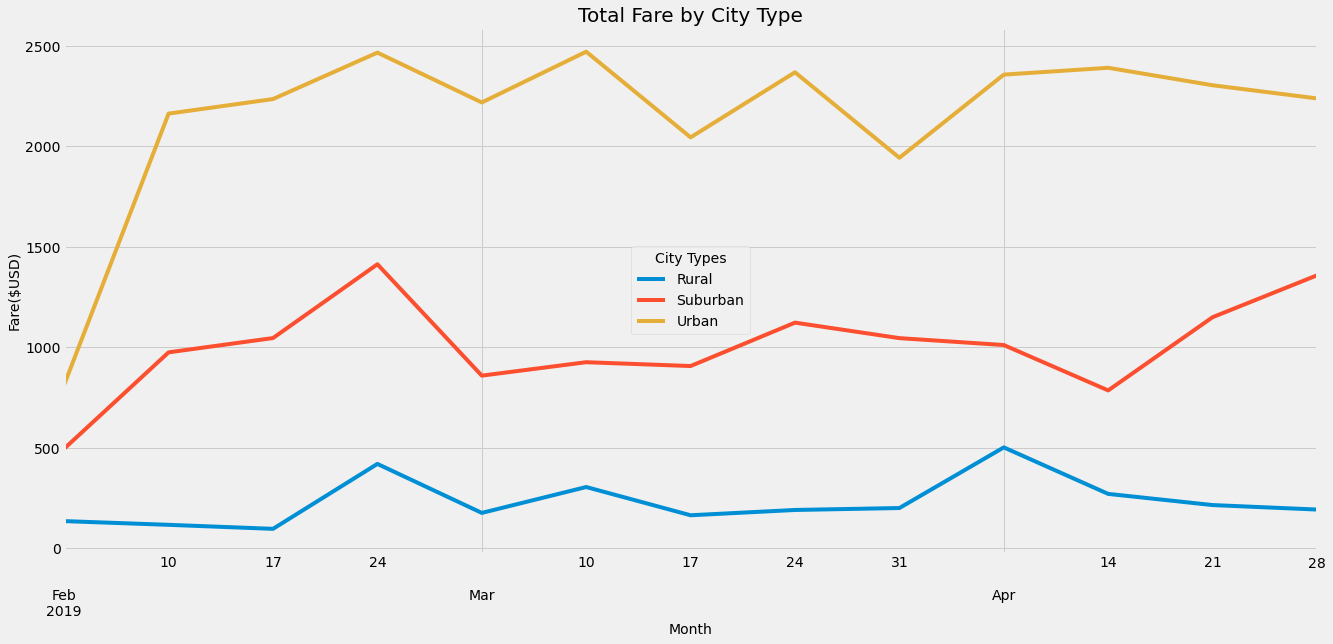

In [52]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
total_fare_per_week.plot(figsize=(20,9))
plt.title("Total Fare by City Type", fontsize=20)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Fare($USD)", fontsize=14)
plt.grid(True)
plt.legend(loc="best", title="City Types")

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
plt.savefig("Analysis/Pyber_fare_summary.png")
